# Import Libraries

In [27]:
import zipfile, os
os.environ["TF_GPU_THREAD_MODE"] = "gpu_private"

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
glioma_dir = os.path.join('dataset/Training/glioma')
meningioma_dir = os.path.join('dataset/Training/meningioma')
notumor_dir = os.path.join('dataset/Training/notumor')
pituitary_dir = os.path.join('dataset/Training/pituitary')

In [3]:
glioma_files = os.listdir(glioma_dir)
meningloma_files = os.listdir(meningioma_dir)
notumor_files = os.listdir(notumor_dir)
pituitary_files = os.listdir(pituitary_dir)

In [4]:
print('Total glioma images :', len(glioma_files))
print('Total meningloma images :', len(meningloma_files))
print('Total notumor images :', len(notumor_files))
print('Total pituitary images :', len(pituitary_files))

Total glioma images : 1321
Total meningloma images : 1339
Total notumor images : 1595
Total pituitary images : 1457


In [7]:
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

In [8]:
# Set up matplotlib fig

pic_index += 5

next_glioma_pix = [os.path.join(glioma_dir, fname)
                for fname in glioma_files[pic_index-5:pic_index]]
next_meningloma_pix = [os.path.join(meningioma_dir, fname)
                for fname in meningloma_files[pic_index-5:pic_index]]
next_notumor_pix = [os.path.join(notumor_dir, fname)
                for fname in notumor_files[pic_index-5:pic_index]]
next_pituitary_pix = [os.path.join(pituitary_dir, fname)
                for fname in pituitary_files[pic_index-5:pic_index]]

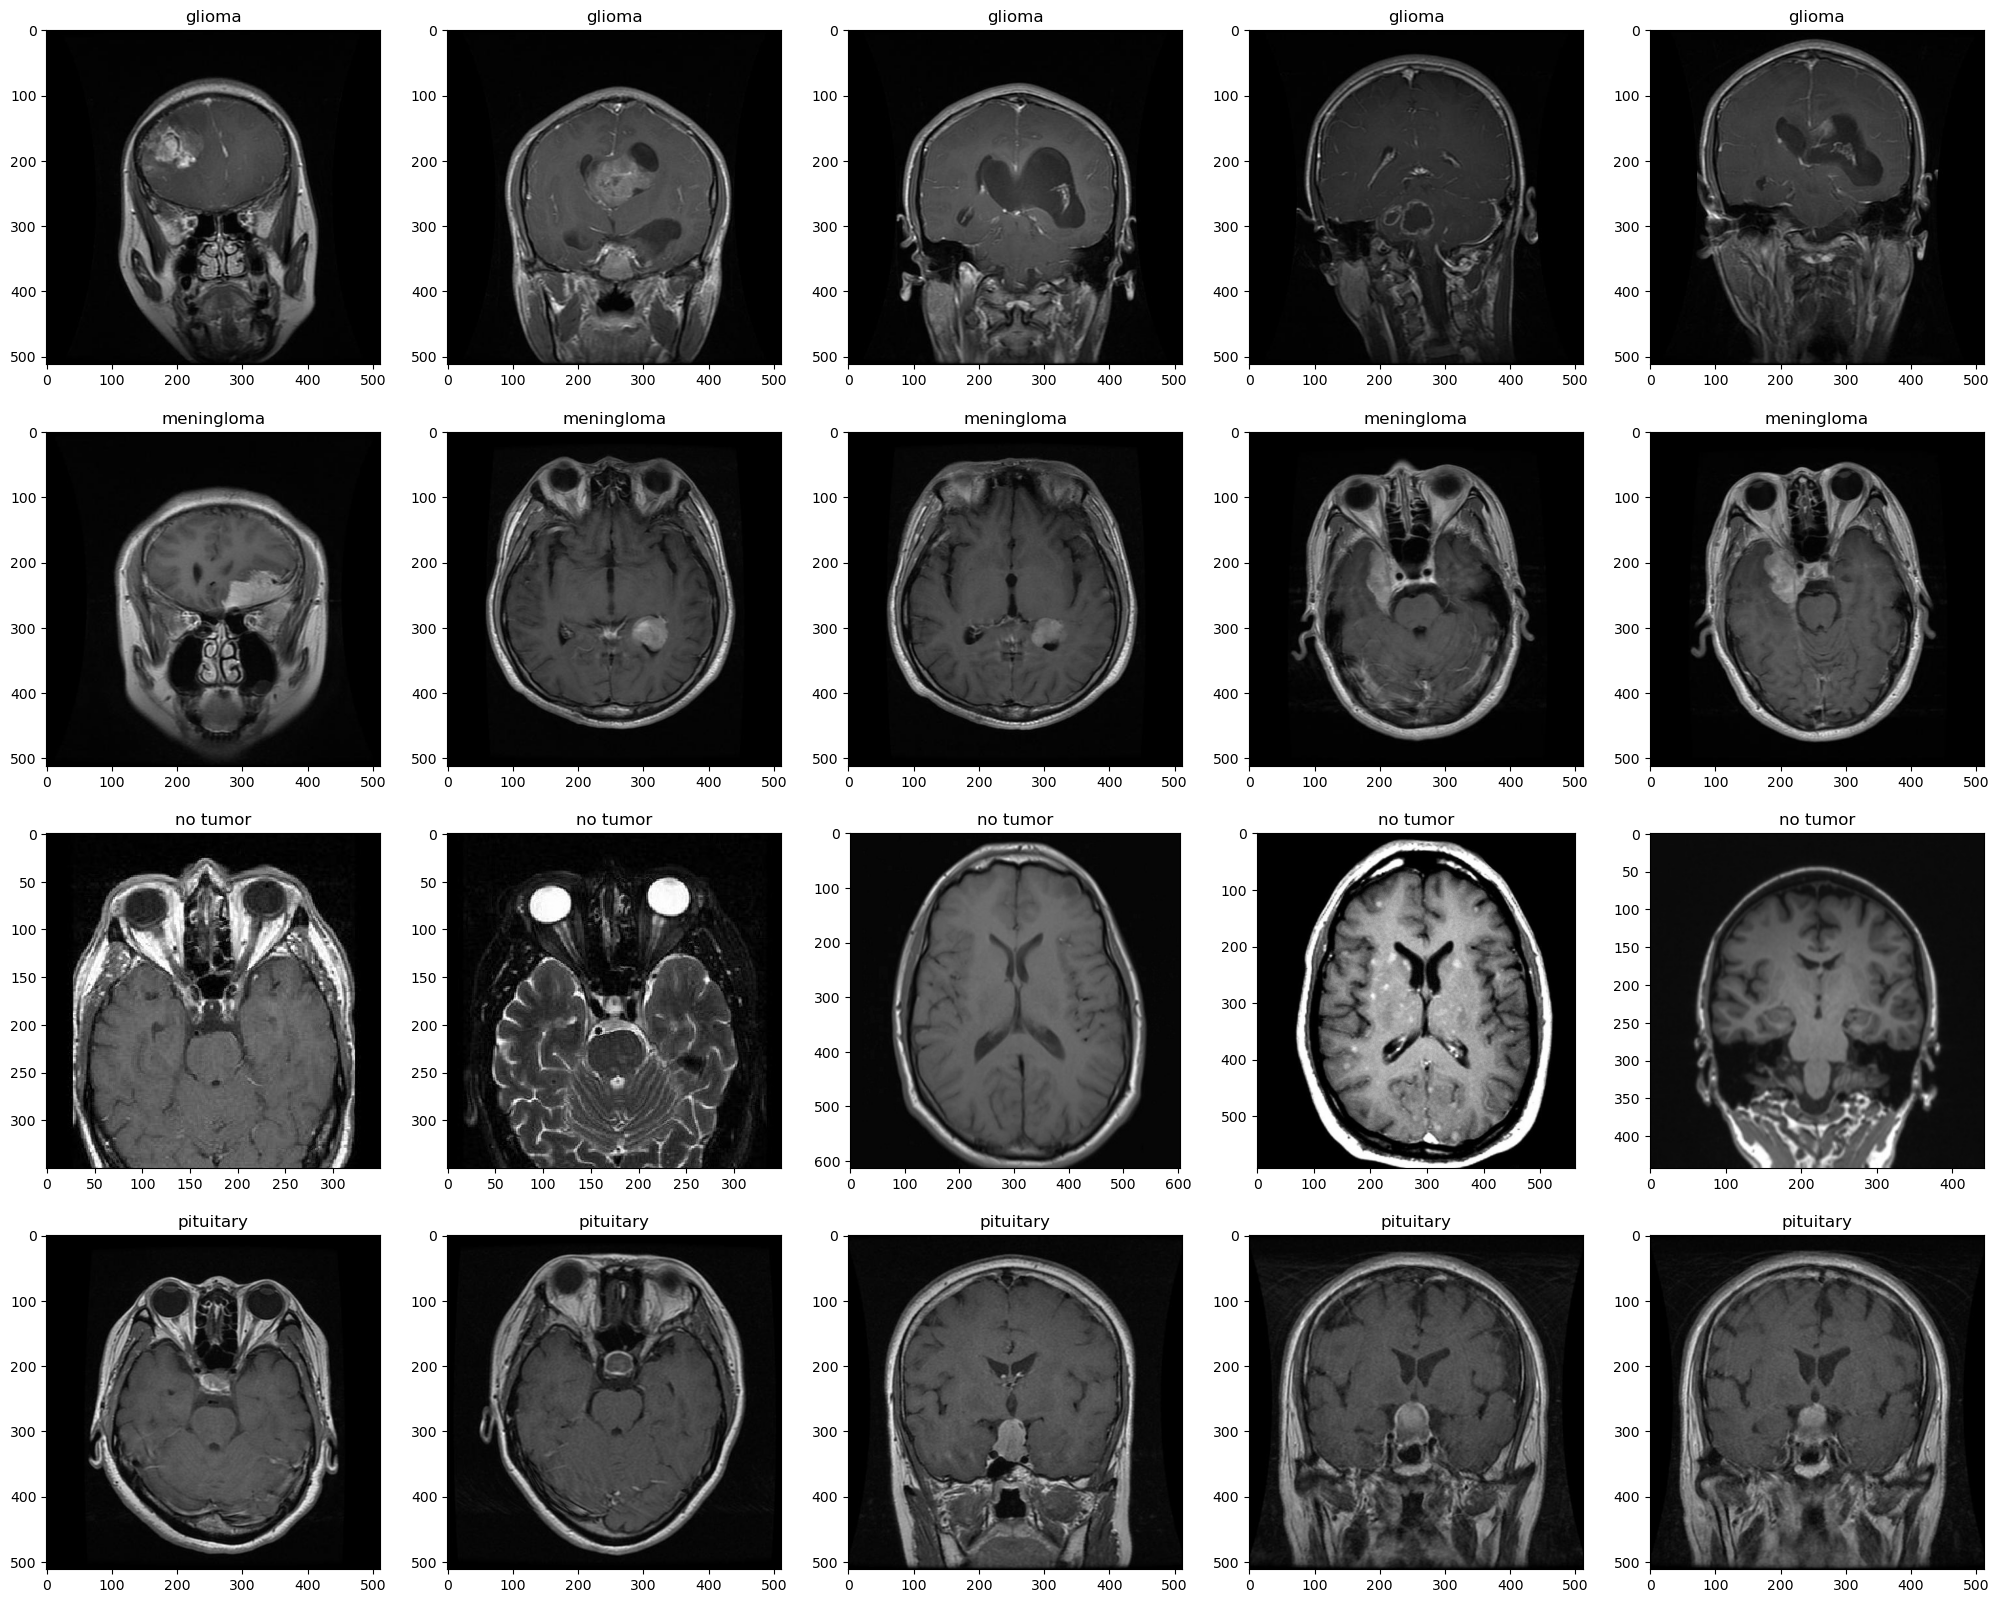

In [9]:
fig, axes = plt.subplots(4,5, figsize=(25,20))
row = 0
col1 = 0
col2 = 0
col3 = 0
col4 = 0
for i, img_path in enumerate(next_glioma_pix+next_meningloma_pix+next_notumor_pix+next_pituitary_pix):
    if i < 5:
        img = mpimg.imread(img_path)
        axes[row][col1].imshow(img)
        axes[row][col1].set_title('glioma')
        col1+=1
    elif i < 10 and i >= 5:
        row=1
        img = mpimg.imread(img_path)
        axes[row][col2].imshow(img)
        axes[row][col2].set_title('meningloma')
        col2+=1
    elif i < 15 and i >= 10:
        row=2
        img = mpimg.imread(img_path)
        axes[row][col3].imshow(img)
        axes[row][col3].set_title('no tumor')
        col3+=1
    elif i < 20 and i >= 15:
        row=3
        img = mpimg.imread(img_path)
        axes[row][col4].imshow(img)
        axes[row][col4].set_title('pituitary')
        col4+=1

# Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(
    validation_split=0.1,
    rescale=1./255
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [21]:
train_dir = 'dataset/Training'
test_dir = 'dataset/Testing'

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset = 'training'
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=False
)


Found 5143 images belonging to 4 classes.
Found 130 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Modelling

In [28]:
model = tf.keras.models.Sequential([
        
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [29]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
          print("\nReached 95% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = MyCallback()

In [30]:
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

history= model.fit(train_generator, epochs=10, callbacks = ([callbacks]), validation_data=val_generator, shuffle=True)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 89s 526ms/step - accuracy: 0.5777 - loss: 0.9358 - val_accuracy: 0.7385 - val_loss: 0.6414
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.8653 - loss: 0.3346 - val_accuracy: 0.8154 - val_loss: 0.5315
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.9231 - loss: 0.2063 - val_accuracy: 0.8692 - val_loss: 0.4946
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.9604 - loss: 0.1127 - val_accuracy: 0.9000 - val_loss: 0.5096
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 269ms/step - accuracy: 0.9723 - loss: 0.0852 - val_accuracy: 0.8923 - val_loss: 0.4681
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - accuracy: 0.9785 - loss: 0.0679 - val_accuracy: 0.9462 - val_loss: 0.3521
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 266ms/step - accuracy: 0.9723 - loss: 0.0673 - val_accuracy: 0.8846 - val_loss: 0.5319
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.9868 - loss: 0

# Evaluation

> Model isn't overfit or underfit

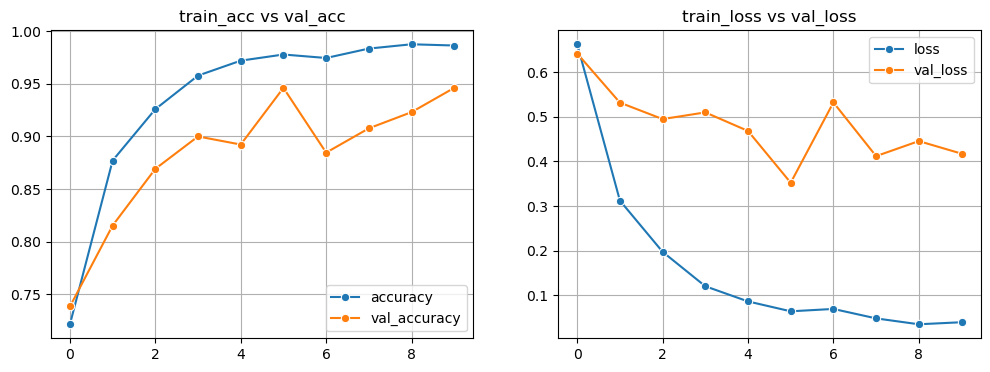

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=history.history['accuracy'], ax=axes[0], label='accuracy', marker='o')
sns.lineplot(data=history.history['val_accuracy'], ax=axes[0], label='val_accuracy', marker='o')

sns.lineplot(data=history.history['loss'], ax=axes[1], label='loss', marker='o')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss', marker='o')

axes[0].set_title('train_acc vs val_acc')
axes[1].set_title('train_loss vs val_loss')

axes[0].grid(True)
axes[1].grid(True)

plt.legend()
plt.show()

In [36]:
test_generator.reset()
pred_probabilities = model.predict(test_generator)

y_pred = np.argmax(pred_probabilities, axis=1)

y_test = test_generator.classes

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step


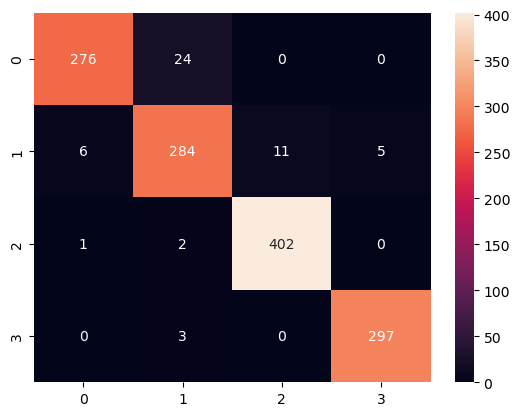

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       300
           1       0.91      0.93      0.92       306
           2       0.97      0.99      0.98       405
           3       0.98      0.99      0.99       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



# Implementation

In [41]:
dict_class = test_generator.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Class labels: ['glioma', 'meningioma', 'notumor', 'pituitary']


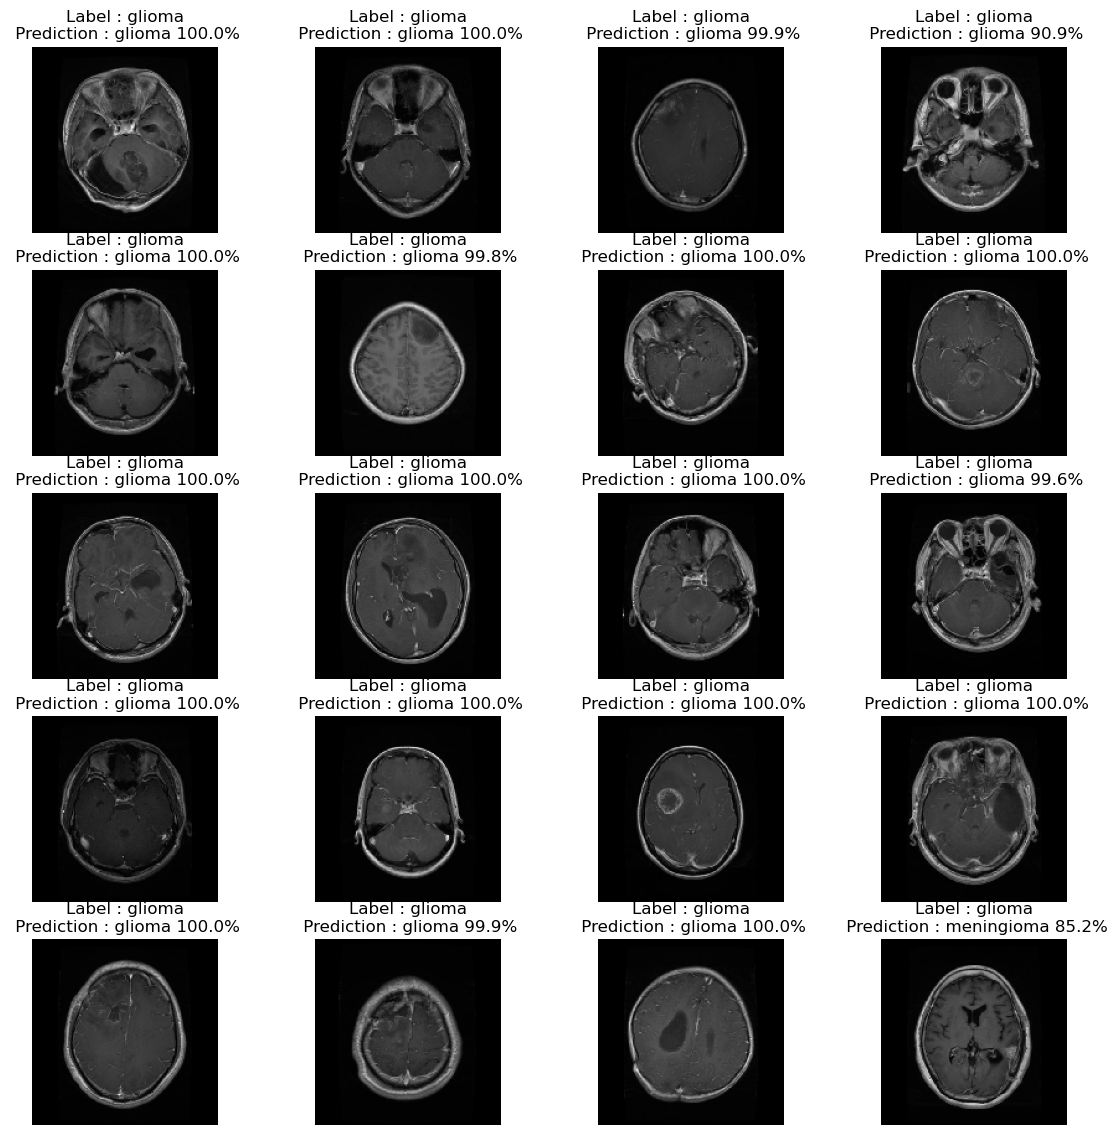

In [49]:
test_generator.reset()
img, label = next(test_generator)


plt.figure(figsize=(14,14))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[y_pred[i]], 100 * np.max(pred_probabilities[i])))
plt.show()

# Model Save

In [50]:
model.save('brain_tumor.h5')